In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


excel_file = pd.ExcelFile("../Datasets/BTI_2006-2022_Scores.xlsx")

sheet_names = excel_file.sheet_names

data_frames = [pd.read_excel("../Datasets/BTI_2006-2022_Scores.xlsx", sheet_name=sheet) for sheet in sheet_names]

merged_df = pd.concat(data_frames, ignore_index=True)
merged_df.to_csv("merged_dataset.csv", index=False)

In [ ]:
dataset = pd.read_csv("merged_dataset.csv")

dataset[dataset == "?"] = np.nan
dataset[dataset == "-"] = np.nan

null_counts = dataset.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Null Count']
null_counts.to_csv("null_counts.csv")

pd.set_option('display.max_columns', 200)  # None removes the limit on number of columns to display
pd.set_option('display.width', 200)  # None removes the limit on display width

null_counts = merged_df.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Null Count']


Colums to be deleted:

- Q5.3 | Approval of democracy         550
- Q16.4 | Civil society participation         137
- Q16.5 | Reconciliation         301
- Q16.4 | Social capital        1096
- Q16.5 | Civil society participation        1096
- Q16.6 | Reconciliation        1116




Regions:

- 1 | East-Central and Southeast Europe
- 2 | Latin America and the Caribbean
- 3 | West and Central Africa
- 4 | Middle East and North Africa
- 5 | Southern and Eastern Africa
- 6 | Post-Soviet Eurasia
- 7 | Asia and Oceania


### Side note:

It was a lot easier to do the remaining filtering part in excel (filtering and deleting by looking at the visuals), so I took that shortcut instead of torturing myself with trying to have Python work properly (most of the time I also cannot be sure or I have to go lengths to be sure that Python is doing what I actually wanted it to do). I started out with the name "deneme.csv" and that stuck around, so that is the final version (I especially did not change the name so I don't mess up my code somehow that is working right now).

### Side note 2:

The remaining code was run twice with two different dataset combinations (General-Set and Specific-Set). I only changed the "relevant_variables" variable to have two different sets of variables. So for the sake of simplicity, I will only have one copy of the codes and simply by changing the that specific variable, everything should (hopefully) run smoothly, if it needs to be replicated for some reason.

for the General-Set: relevant_variables = [column_list[104], column_list[30], column_list[32], column_list[37], column_list[40], column_list[43], column_list[46], column_list[48]]

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv("deneme.csv")

In [4]:
dataset[dataset == "?"] = np.nan
dataset[dataset == "-"] = np.nan

null_counts = dataset.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Null Count']
null_counts.to_csv("null_counts.csv")

In [7]:
from sklearn.preprocessing import LabelEncoder

le_dem_aut = LabelEncoder()
dataset['Democracy/Autocracy_le'] = le_dem_aut.fit_transform(dataset['Democracy/Autocracy'])

le_si = LabelEncoder()
dataset['Status Index_le'] = le_si.fit_transform(dataset['Status Index'])

le_ds = LabelEncoder()
dataset['Democracy Status_le'] = le_ds.fit_transform(dataset['Democracy Status'])

le_es = LabelEncoder()
dataset['Economy Status_le'] = le_es.fit_transform(dataset['Economy Status'])

le_gi = LabelEncoder()
dataset['Governance Index_le'] = le_gi.fit_transform(dataset['Governance Index'])

le_gp = LabelEncoder()
dataset['Governance Performance_le'] = le_gp.fit_transform(dataset['Governance Performance'])

le_reg = LabelEncoder()
dataset['Region_le'] = le_reg.fit_transform(dataset['Region'])

In [9]:
for x,y in enumerate(list(dataset.columns)):
    print(f"Index {x}{y}")

Index 0Country
Index 1Region
Index 2  Ranking Status Index
Index 3  S | Status Index
Index 4  Ranking Democracy Status
Index 5  SI | Democracy Status
Index 6  Q1 | Stateness
Index 7  Q1.1 | Monopoly on the use of force
Index 8  Q1.2 | State identity
Index 9  Q1.3 | No interference of religious dogmas
Index 10  Q1.4 | Basic administration
Index 11  Q2 | Political Participation
Index 12  Q2.1 | Free and fair elections
Index 13  Q2.2 | Effective power to govern
Index 14  Q2.3 | Association / assembly rights
Index 15  Q2.4 | Freedom of expression
Index 16  Q3 | Rule of Law
Index 17  Q3.1 | Separation of powers
Index 18  Q3.2 | Independent judiciary
Index 19  Q3.3 | Prosecution of office abuse
Index 20  Q3.4 | Civil rights
Index 21  Q4 | Stability of Democratic Institutions
Index 22  Q4.1 | Performance of democratic institutions
Index 23  Q4.2 | Commitment to democratic institutions
Index 24  Q5 | Political and Social Integration
Index 25  Q5.1 | Party system
Index 26  Q5.2 | Interest group

# knn

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

knn=KNeighborsClassifier(n_neighbors=6)
column_list = list(dataset.columns)

relevant_variables = [column_list[104], column_list[33], column_list[34], column_list[35],
                      column_list[36], column_list[38], column_list[39], column_list[41], 
                      column_list[42], column_list[44], column_list[45], column_list[47],
                      column_list[49], column_list[50], column_list[31]]
X = dataset[relevant_variables].to_numpy()
y = dataset["Democracy/Autocracy"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)


In [19]:
print(relevant_variables)

['Region_le', '  Q7.1 | Market organization', '  Q7.2 | Competition policy', '  Q7.3 | Liberalization of foreign trade', '  Q7.4 | Banking system', '  Q8.1 | Monetary stability', '  Q8.2 | Fiscal stability', '  Q9.1 | Property rights', '  Q9.2 | Private enterprise', '  Q10.1 | Social safety nets', '  Q10.2 | Equal opportunity', '  Q11.1 | Output strength', '  Q12.1 | Environmental policy', '  Q12.2 | Education / R&D policy', '  Q6.1 | Socioeconomic barriers']


In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [23]:
y_pred=knn.predict(X_test)

knn.score(X_test, y_test)

0.8796561604584527

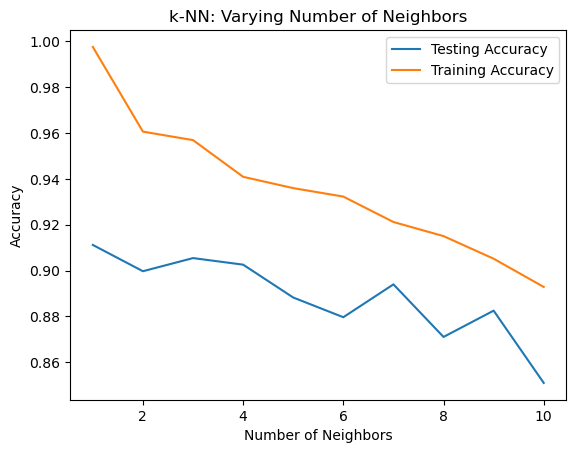

In [29]:
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors':np.arange(1,5)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=6)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 1}
0.90693160977868


In [33]:
knn1=KNeighborsClassifier(n_neighbors=1)
knn3=KNeighborsClassifier(n_neighbors=3)

knn1.fit(X_train,y_train)
knn3.fit(X_train,y_train)

y_pred1=knn1.predict(X_test)

knn1.score(X_test, y_test)

0.9111747851002865

In [409]:
y_pred3=knn3.predict(X_test)

knn3.score(X_test, y_test)

0.896551724137931

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))
knn1tab= classification_report(y_test, y_pred1, output_dict=True)
knn1tab= pd.DataFrame(knn1tab)
knn1tab.to_csv("table.csv")
print(classification_report(y_test, y_pred1))


[[141  15]
 [ 27 166]]
              precision    recall  f1-score   support

        Aut.       0.91      0.88      0.90       156
        Dem.       0.91      0.93      0.92       193

    accuracy                           0.91       349
   macro avg       0.91      0.91      0.91       349
weighted avg       0.91      0.91      0.91       349



In [37]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(knn1, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)})")

0.933
0.025
Confidence interval for this model: 0.922-0.944)


# tree

In [63]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report


clf = tree.DecisionTreeClassifier(max_depth=25)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

y_pred_proba = clf.predict_proba

print('Depth of the Decision Tree :', clf.get_depth())

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

table = classification_report(y_test, y_pred, output_dict=True)
table= pd.DataFrame(table)
table.to_csv("table.csv")
print(classification_report(y_test, y_pred))

Depth of the Decision Tree : 16
[[136  20]
 [ 15 178]]
              precision    recall  f1-score   support

        Aut.       0.90      0.87      0.89       156
        Dem.       0.90      0.92      0.91       193

    accuracy                           0.90       349
   macro avg       0.90      0.90      0.90       349
weighted avg       0.90      0.90      0.90       349

              precision    recall  f1-score   support

        Aut.       0.90      0.87      0.89       156
        Dem.       0.90      0.92      0.91       193

    accuracy                           0.90       349
   macro avg       0.90      0.90      0.90       349
weighted avg       0.90      0.90      0.90       349



In [59]:
# Import necessary modules
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": randint(1,26),
              "max_features": randint(1, 50),
              "min_samples_leaf": randint(1, 50),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 19, 'min_samples_leaf': 4}
Best score is 0.8620616526546996


In [61]:
best_params = {
    'criterion': 'gini',
    'max_depth': 11,
    'max_features': 19,
    'min_samples_leaf': 4
}

clf = DecisionTreeClassifier(
    criterion=best_params['criterion'],
    max_depth=best_params['max_depth'],
    max_features=best_params['max_features'],
    min_samples_leaf=best_params['min_samples_leaf']
)

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Depth of the Decision Tree:', clf.get_depth())

print(confusion_matrix(y_test, y_pred))
table = classification_report(y_test, y_pred, output_dict=True)
table= pd.DataFrame(table)
table.to_csv("table.csv")
print(classification_report(y_test, y_pred))


Depth of the Decision Tree: 11
[[134  22]
 [ 17 176]]
              precision    recall  f1-score   support

        Aut.       0.89      0.86      0.87       156
        Dem.       0.89      0.91      0.90       193

    accuracy                           0.89       349
   macro avg       0.89      0.89      0.89       349
weighted avg       0.89      0.89      0.89       349



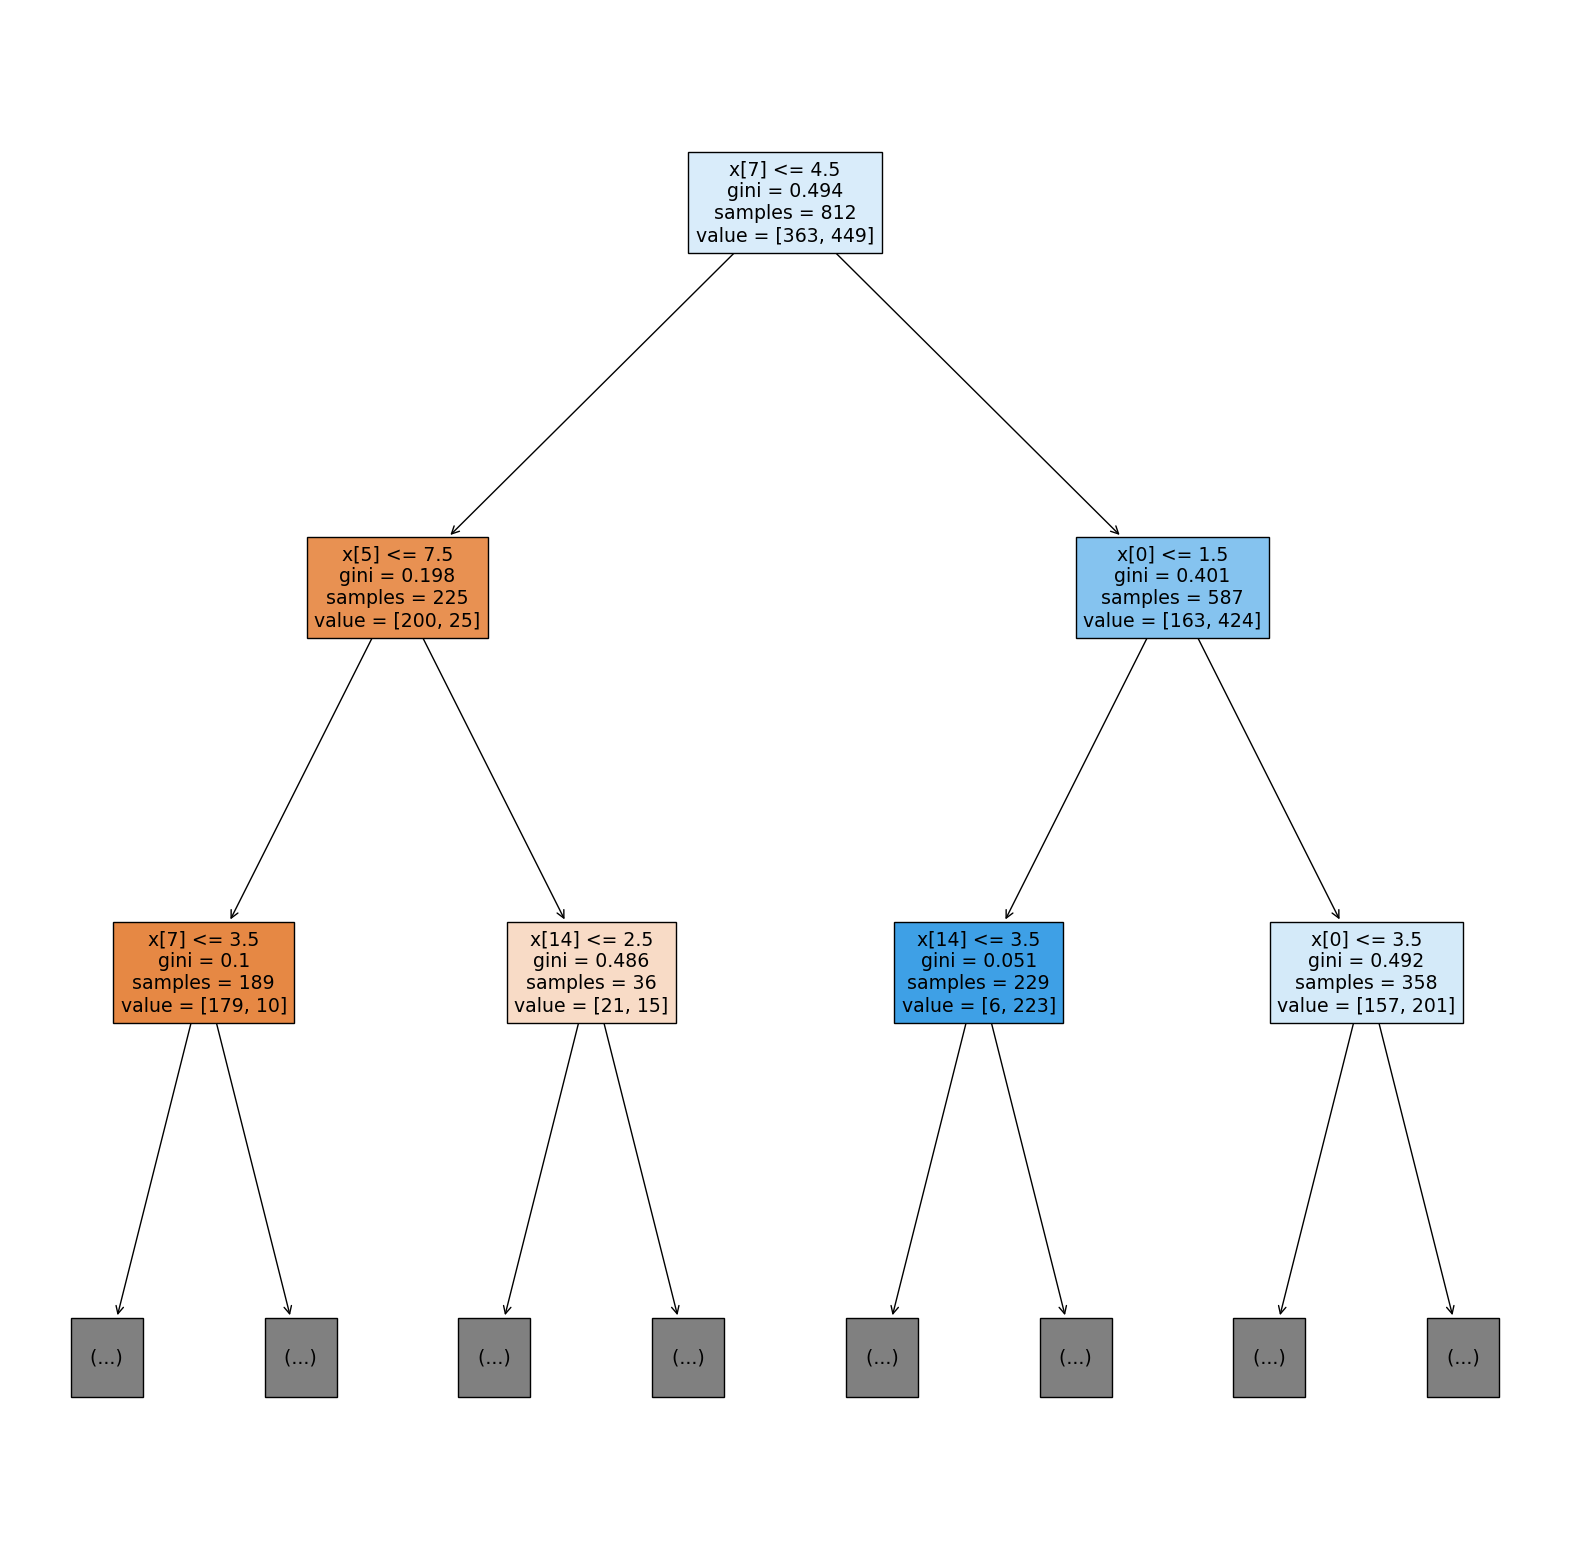

In [65]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
plot_tree(clf, filled=True, max_depth=2)
plt.show()

In [75]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(clf, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)})")

0.901
0.043
Confidence interval for this model: 0.882-0.92)


# logistic

In [77]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [79]:
dataset["Democracy/Autocracy_dummy"] = dataset["Democracy/Autocracy"].map({"Aut.": 0, "Dem.": 1})

y_dummy = np.array(dataset["Democracy/Autocracy_dummy"])
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y_dummy, test_size=0.3, random_state=21, stratify=y_dummy)

In [81]:
logreg = LogisticRegression()
logreg.fit(X2_train, y2_train)

logreg_pred = logreg.predict(X2_test)

accuracy = logreg.score(X2_test, y2_test)
print("Accuracy:", accuracy)

table = classification_report(y2_test, logreg_pred, output_dict=True)
table= pd.DataFrame(table)
table.to_csv("table.csv")
print(classification_report(y2_test, logreg_pred))

Accuracy: 0.8108882521489972
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       156
           1       0.84      0.81      0.83       193

    accuracy                           0.81       349
   macro avg       0.81      0.81      0.81       349
weighted avg       0.81      0.81      0.81       349



In [83]:
from sklearn.linear_model import LogisticRegression

ridge_log_reg = LogisticRegression(penalty='l2', C=0.1) 

ridge_log_reg.fit(X2_train, y2_train)

ridge_log_reg_pred = ridge_log_reg.predict(X2_test)

accuracy = ridge_log_reg.score(X2_test, y2_test)
print("Accuracy:", accuracy)

print(confusion_matrix(y2_test, ridge_log_reg_pred))
print(classification_report(y2_test, ridge_log_reg_pred))

Accuracy: 0.8166189111747851
[[126  30]
 [ 34 159]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       156
           1       0.84      0.82      0.83       193

    accuracy                           0.82       349
   macro avg       0.81      0.82      0.81       349
weighted avg       0.82      0.82      0.82       349



In [436]:
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')

lasso_log_reg.fit(X2_train, y2_train)

lasso_log_reg_pred = ridge_log_reg.predict(X2_test)

accuracy = lasso_log_reg.score(X2_test, y2_test)
print("Accuracy:", accuracy)

print(confusion_matrix(y2_test, lasso_log_reg_pred))
print(classification_report(y2_test, lasso_log_reg_pred))


Accuracy: 0.7787356321839081
[[106  49]
 [ 31 162]]
              precision    recall  f1-score   support

           0       0.77      0.68      0.73       155
           1       0.77      0.84      0.80       193

    accuracy                           0.77       348
   macro avg       0.77      0.76      0.76       348
weighted avg       0.77      0.77      0.77       348



In [85]:
cv_results = cross_val_score(logreg, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)}")

0.817
0.035
Confidence interval for this model: 0.802-0.832


# naive bayes

In [91]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
table = classification_report(y_test, y_pred, output_dict=True)
table= pd.DataFrame(table)
table.to_csv("table.csv")
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 349 points : 94
              precision    recall  f1-score   support

        Aut.       0.70      0.69      0.69       156
        Dem.       0.75      0.77      0.76       193

    accuracy                           0.73       349
   macro avg       0.73      0.73      0.73       349
weighted avg       0.73      0.73      0.73       349



In [89]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
y_pred = mnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
table = classification_report(y_test, y_pred, output_dict=True)
table= pd.DataFrame(table)
table.to_csv("table.csv")
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 349 points : 115
              precision    recall  f1-score   support

        Aut.       0.62      0.69      0.65       156
        Dem.       0.72      0.65      0.69       193

    accuracy                           0.67       349
   macro avg       0.67      0.67      0.67       349
weighted avg       0.68      0.67      0.67       349



In [93]:
cv_results = cross_val_score(gnb, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)}")

0.742
0.056
Confidence interval for this model: 0.717-0.767


In [460]:
cv_results = cross_val_score(mnb, X, y, cv=20)

#print(cv_results)
mean = round(np.mean(cv_results), 3)
std = round(np.std(cv_results),3)
sem = std/(np.sqrt(20))

print(mean)
print(std)
print(f"Confidence interval for this model: {round(mean - 1.96*sem,3)}-{round(mean + 1.96*sem,3)}")

0.677
0.063
Confidence interval for this model: 0.649-0.705


# svm

In [276]:
from sklearn import svm

SVC = svm.SVC(kernel='linear')
SVC.fit(X_train, y_train)
y_pred = SVC.predict(X_test)

print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 348 points : 54


In [478]:
y_pred  = svm.SVC(kernel='linear', C=100).fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 348 points : 77
              precision    recall  f1-score   support

        Aut.       0.82      0.65      0.72       155
        Dem.       0.76      0.89      0.82       193

    accuracy                           0.78       348
   macro avg       0.79      0.77      0.77       348
weighted avg       0.78      0.78      0.77       348



In [476]:
y_pred  = svm.SVC(kernel='linear', C=1000).fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 348 points : 77
              precision    recall  f1-score   support

        Aut.       0.82      0.65      0.72       155
        Dem.       0.76      0.89      0.82       193

    accuracy                           0.78       348
   macro avg       0.79      0.77      0.77       348
weighted avg       0.78      0.78      0.77       348



In [480]:
y_pred  = svm.SVC(kernel='linear', C=0.1).fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test, y_pred))

Number of mislabeled points out of a total 348 points : 76
              precision    recall  f1-score   support

        Aut.       0.83      0.65      0.72       155
        Dem.       0.76      0.89      0.82       193

    accuracy                           0.78       348
   macro avg       0.79      0.77      0.77       348
weighted avg       0.79      0.78      0.78       348



In [ ]:
y_pred  = svm.SVC(kernel='linear', C=1E6).fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
print(classification_report(y_test, y_pred))

In [282]:
y_pred  = svm.SVC(kernel='rbf', C=1E16).fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 348 points : 55


# tree graph

/var/folders/cf/dxphc13j51j6m28qbd4tj7xh0000gn/T/ipykernel_37888/1293547567.py:31: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3,


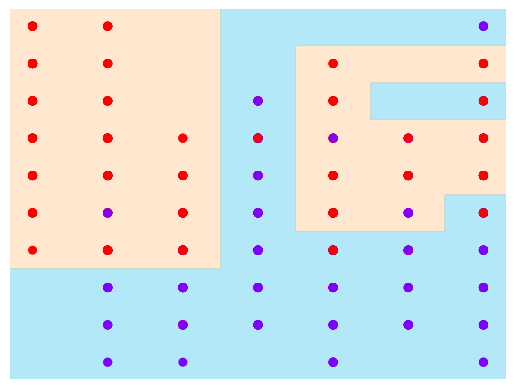

In [73]:
from sklearn.tree import DecisionTreeClassifier

X2 = dataset[relevant_variables].to_numpy()
y2 = dataset["Democracy/Autocracy_le"].to_numpy()

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=21, stratify=y)




K_dum = X2[:,0:2] #Let's assume X has two features, take the first two, and ignore the rest.
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
visualize_classifier(DecisionTreeClassifier(criterion='gini'), K_dum, y2)